# Image classification with transfer learning

The following is based on [this tutorial](https://learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/) from LearnOpenCV.

## Set up

In [1]:
# Import modules and models
import numpy as np
import pandas as pd
from tensorflow.keras.applications import (
    vgg16,
    resnet50,
    mobilenet,
    inception_v3)
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [2]:
# Initialise models
vgg_model = vgg16.VGG16(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

## Load and preprocess image

Jpg image is taken from the directory 'images'.

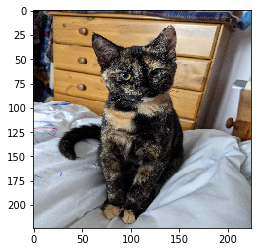

In [3]:
# Assign the image path for the classification experiments
foldername = './images/'
filename = 'cat'
filepath = foldername + filename + '.jpg'

# Load an image in PIL format
original = load_img(filepath, target_size=(224, 224))

# Convert the PIL image to a numpy array
# In PIL image is (width, height, channel)
# In Numpy image is (height, width, channel)
numpy_image = img_to_array(original)

# Convert the image / images into batch format
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
plt.imshow(np.uint8(image_batch[0]))

## Use models to predict class

### VGG16

In [4]:
# Prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
# Get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# Print predictions
# Convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
# Print VGG16 predictions
for prediction_id in range(len(label_vgg[0])):
    print(label_vgg[0][prediction_id])

('n02123045', 'tabby', 0.46045914)
('n02124075', 'Egyptian_cat', 0.26346946)
('n02123159', 'tiger_cat', 0.121017106)
('n04265275', 'space_heater', 0.020890158)
('n04033995', 'quilt', 0.01693488)


### ResNet

In [5]:
# Prepare the image for the ResNet model
processed_image = resnet50.preprocess_input(image_batch.copy())
# Get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)
# Print predictions
# Convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_resnet = decode_predictions(predictions)
# Print ResNet predictions
for prediction_id in range(len(label_resnet[0])):
    print(label_resnet[0][prediction_id])

('n04033995', 'quilt', 0.18575484)
('n02123045', 'tabby', 0.14281544)
('n02124075', 'Egyptian_cat', 0.09912669)
('n03938244', 'pillow', 0.0787892)
('n03887697', 'paper_towel', 0.06864217)


### Inception

In [6]:
# Prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())
# Get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)
# Print predictions
# Convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_inception = decode_predictions(predictions)
# Print Inception predictions
for prediction_id in range(len(label_inception[0])):
    print(label_inception[0][prediction_id])

('n02124075', 'Egyptian_cat', 0.6110458)
('n02123045', 'tabby', 0.29672545)
('n02127052', 'lynx', 0.0468541)
('n02123597', 'Siamese_cat', 0.021483697)
('n02123159', 'tiger_cat', 0.014768499)


### MobileNet

In [7]:
# Prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())
# Get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)
# Print predictions
# Convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_mobilenet = decode_predictions(predictions)
# Print MobileNet predictions
for prediction_id in range(len(label_mobilenet[0])):
    print(label_mobilenet[0][prediction_id])

('n02123045', 'tabby', 0.2807824)
('n02123597', 'Siamese_cat', 0.2450607)
('n02124075', 'Egyptian_cat', 0.15153317)
('n02123159', 'tiger_cat', 0.12267317)
('n04033995', 'quilt', 0.049666032)


## Print picture with chosen model predictions

In [8]:
# Create lists of predictions and probabilities
predictions = []
probabilities = []

for prediction_id in range(len(label_vgg[0])):
    prediction = label_vgg[0][prediction_id][1].replace("_", " ")
    probability = round(label_vgg[0][prediction_id][2]*100,1)
    predictions.append(prediction)
    probabilities.append(probability)
    
# Save as dataframe
preds_probs = pd.DataFrame(
    {'Prediction': predictions,
     'Confidence (%)': probabilities
    })
preds_probs

,Prediction,Confidence (%)
0,tabby,46.0
1,Egyptian cat,26.3
2,tiger cat,12.1
3,space heater,2.1
4,quilt,1.7


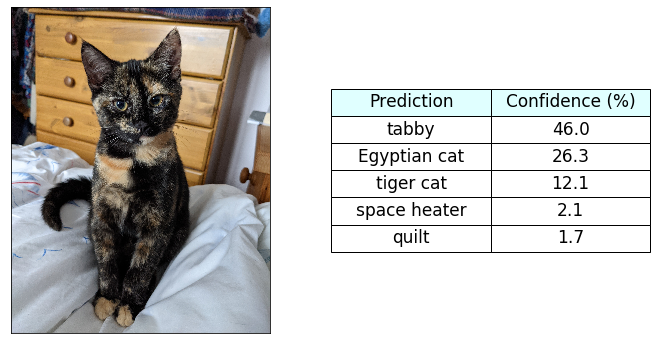

In [9]:
# Load original picture with original dimensions
display_image = load_img(filepath)

# Arrange subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Show image
ax1.imshow(display_image)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

# Show table of predictions
table = ax2.table(cellText=preds_probs.values,
                  colLabels=preds_probs.columns,
                  cellLoc='center',
                  colColours=['lightcyan','lightcyan'],
                  bbox=[0,0.25,1,0.5])
# Modify table
table.set_fontsize(18)
table.scale(1,3)
ax2.axis('off')

plt.subplots_adjust(wspace=0.1)
plt.savefig(foldername + filename + '_predictions.jpg')

## Print picture with all predictions

In [10]:
# VGG16
# Create lists of predictions and probabilities
predictions = []
probabilities = []

for prediction_id in range(len(label_vgg[0])):
    prediction = label_vgg[0][prediction_id][1].replace("_", " ")
    probability = round(label_vgg[0][prediction_id][2]*100,1)
    predictions.append(prediction)
    probabilities.append(probability)
    
# Save as dataframe
vgg_preds_probs = pd.DataFrame(
    {'Prediction': predictions,
     'Confidence (%)': probabilities
    })

In [11]:
# ResNet
# Create lists of predictions and probabilities
predictions = []
probabilities = []

for prediction_id in range(len(label_resnet[0])):
    prediction = label_resnet[0][prediction_id][1].replace("_", " ")
    probability = round(label_resnet[0][prediction_id][2]*100,1)
    predictions.append(prediction)
    probabilities.append(probability)
    
# Save as dataframe
resnet_preds_probs = pd.DataFrame(
    {'Prediction': predictions,
     'Confidence (%)': probabilities
    })

In [12]:
# Inception
# Create lists of predictions and probabilities
predictions = []
probabilities = []

for prediction_id in range(len(label_inception[0])):
    prediction = label_inception[0][prediction_id][1].replace("_", " ")
    probability = round(label_inception[0][prediction_id][2]*100,1)
    predictions.append(prediction)
    probabilities.append(probability)
    
# Save as dataframe
inception_preds_probs = pd.DataFrame(
    {'Prediction': predictions,
     'Confidence (%)': probabilities
    })

In [13]:
# MobileNet
# Create lists of predictions and probabilities
predictions = []
probabilities = []

for prediction_id in range(len(label_mobilenet[0])):
    prediction = label_mobilenet[0][prediction_id][1].replace("_", " ")
    probability = round(label_mobilenet[0][prediction_id][2]*100,1)
    predictions.append(prediction)
    probabilities.append(probability)
    
# Save as dataframe
mobilenet_preds_probs = pd.DataFrame(
    {'Prediction': predictions,
     'Confidence (%)': probabilities
    })

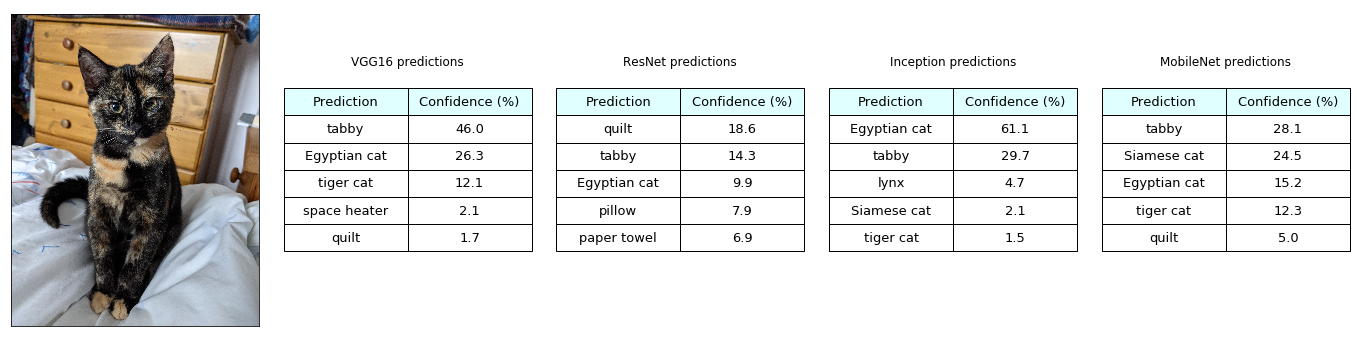

In [14]:
# Load original picture with original dimensions
display_image = load_img(filepath)

# Arrange subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24,6))
#fig.tight_layout()

# Show image
ax1.imshow(display_image)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

# Show table of VGG predictions
table = ax2.table(cellText=vgg_preds_probs.values,
                  colLabels=vgg_preds_probs.columns,
                  cellLoc='center',
                  colColours=['lightcyan','lightcyan'],
                  bbox=[0,0.25,1,0.5])
ax2.set_title('VGG16 predictions', x=.5, y=.8)
# Modify table
table.set_fontsize(18)
table.scale(1,3)
ax2.axis('off')

# Show table of ResNet predictions
table = ax3.table(cellText=resnet_preds_probs.values,
                  colLabels=resnet_preds_probs.columns,
                  cellLoc='center',
                  colColours=['lightcyan','lightcyan'],
                  bbox=[0,0.25,1,0.5])
ax3.set_title('ResNet predictions', x=.5, y=.8)
# Modify table
table.set_fontsize(18)
table.scale(1,3)
ax3.axis('off')

# Show table of Inception predictions
table = ax4.table(cellText=inception_preds_probs.values,
                  colLabels=inception_preds_probs.columns,
                  cellLoc='center',
                  colColours=['lightcyan','lightcyan'],
                  bbox=[0,0.25,1,0.5])
ax4.set_title('Inception predictions', x=.5, y=.8)
# Modify table
table.set_fontsize(18)
table.scale(1,3)
ax4.axis('off')

# Show table of MobileNet predictions
table = ax5.table(cellText=mobilenet_preds_probs.values,
                  colLabels=mobilenet_preds_probs.columns,
                  cellLoc='center',
                  colColours=['lightcyan','lightcyan'],
                  bbox=[0,0.25,1,0.5])
ax5.set_title('MobileNet predictions', x=.5, y=.8)
# Modify table
table.set_fontsize(18)
table.scale(1,3)
ax5.axis('off')

plt.subplots_adjust(wspace=0.1)
plt.savefig(foldername + filename + '_all_predictions.jpg')